In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


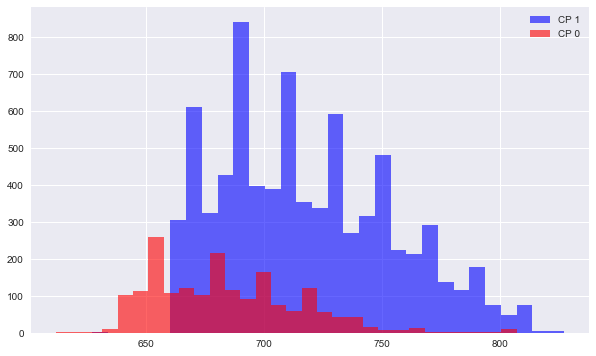

In [5]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy'] == 1]['fico'].hist(bins = 30, color = 'blue', label = 'CP 1', alpha = 0.6)
loans[loans['credit.policy'] == 0]['fico'].hist(bins = 30, color = 'red', label = 'CP 0', alpha = 0.6)
plt.legend()

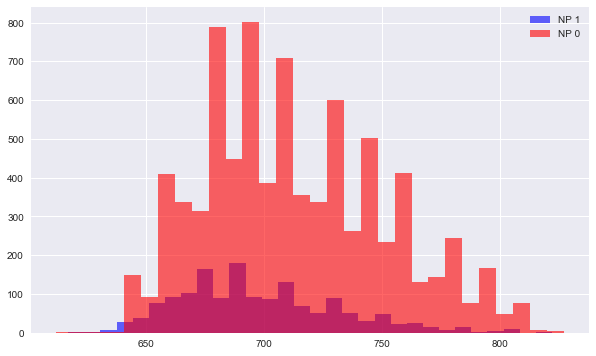

In [6]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid'] == 1]['fico'].hist(bins = 30, color = 'blue', label = 'NP 1', alpha = 0.6)
loans[loans['not.fully.paid'] == 0]['fico'].hist(bins = 30, color = 'red', label = 'NP 0', alpha = 0.6)
plt.legend()

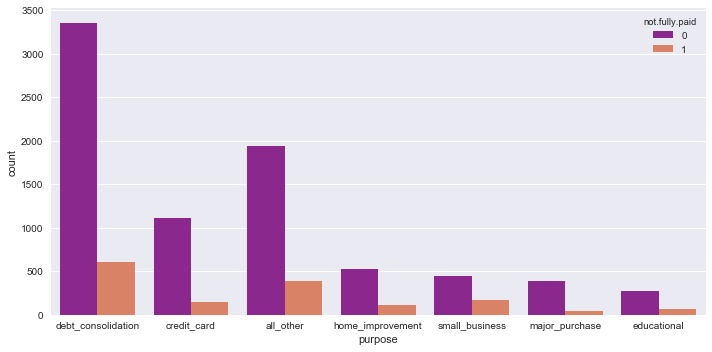

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'purpose', data = loans, hue = 'not.fully.paid', palette='plasma')
plt.tight_layout()

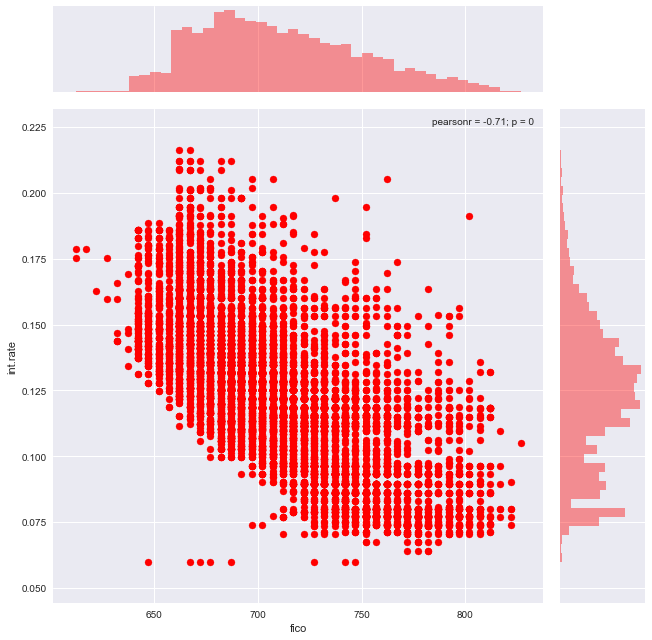

In [8]:
sns.jointplot(x = 'fico', y = 'int.rate', data = loans, color='red', size = 9)

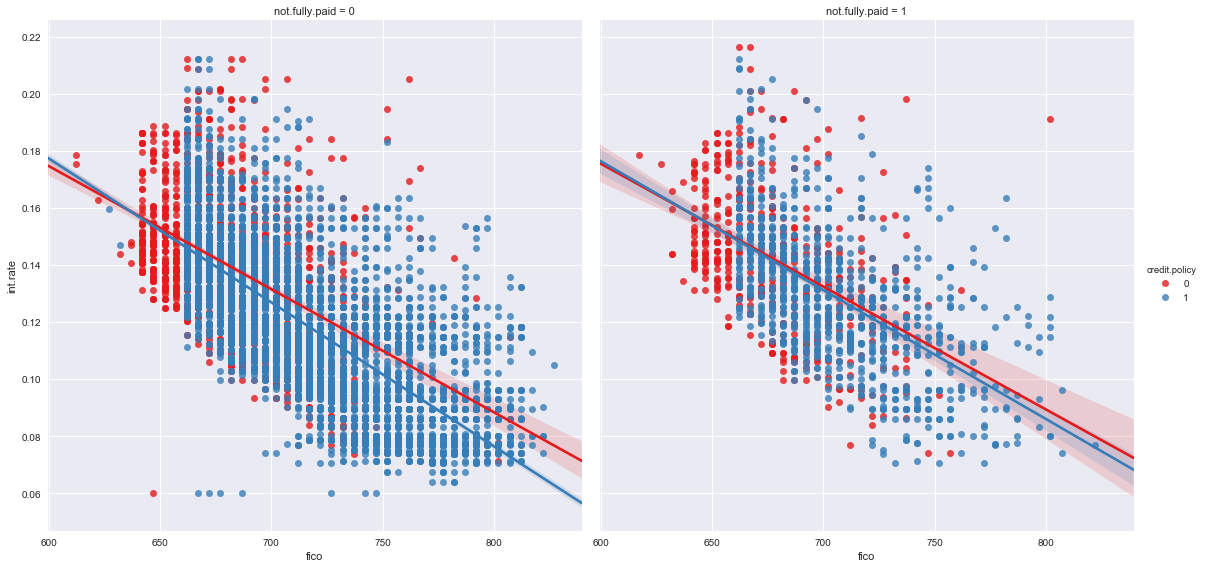

In [9]:
sns.lmplot(x = 'fico', y = 'int.rate', data = loans, hue = 'credit.policy', col='not.fully.paid',palette = 'Set1', size = 8)

In [10]:
cat_feats = ['purpose']
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = final_data.drop('not.fully.paid', axis = 1)
y = loans['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.87      0.83      0.85      2451
          1       0.20      0.25      0.23       423

avg / total       0.77      0.74      0.76      2874



In [16]:
print(confusion_matrix(y_test, pred))

[[2033  418]
 [ 316  107]]


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators = 300)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [19]:
print(classification_report(y_test, pred_rfc))
print('\n')
print(confusion_matrix(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.86      0.99      0.92      2451
          1       0.38      0.03      0.05       423

avg / total       0.79      0.85      0.79      2874



[[2433   18]
 [ 412   11]]
